In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [2]:
df=pd.read_csv('dmart.csv')

In [3]:
print(df.head(10))
print(df.tail(10))

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
5      1     1  2010-03-12      21043.39      False
6      1     1  2010-03-19      22136.64      False
7      1     1  2010-03-26      26229.21      False
8      1     1  2010-04-02      57258.43      False
9      1     1  2010-04-09      42960.91      False
      Store  Dept        Date  Weekly_Sales  IsHoliday
1991      1    14  2012-08-17      12419.06      False
1992      1    14  2012-08-24      11041.63      False
1993      1    14  2012-08-31      12912.96      False
1994      1    14  2012-09-07      13711.08       True
1995      1    14  2012-09-14      11596.10      False
1996      1    14  2012-09-21      12193.80      False
1997      1    14  2012-09-28      12037.66

In [4]:
ts= df['Weekly_Sales']

<Axes: >

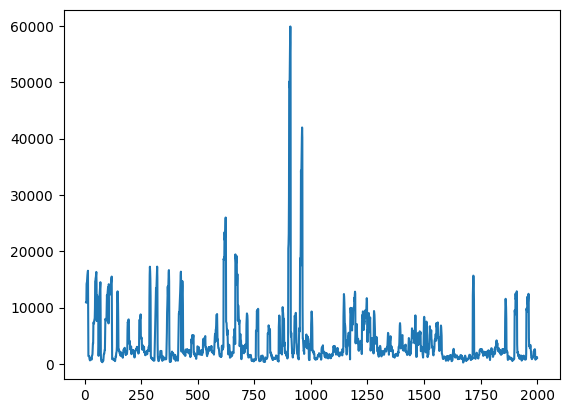

In [5]:
ts.rolling(7).std().plot() #7 because dealing with weekly data

<Axes: >

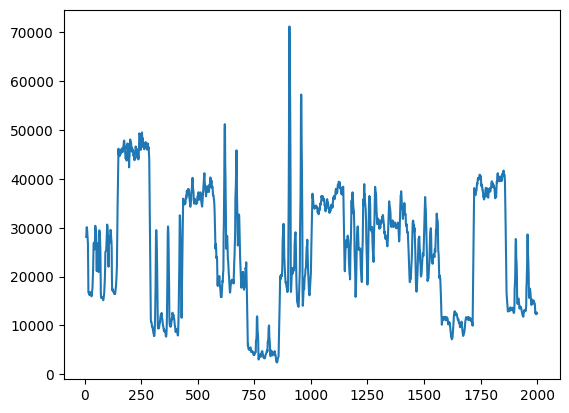

In [6]:
ts.rolling(7).mean().plot()

In [7]:
df['Date']=pd.to_datetime(df['Date'])
print(df.head())
print(df.tail())
df.set_index(['Date'],inplace=True)  #we need data based on Month so we are making it as an index for easy use 
print(df.head())
print(df.tail())

   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False
      Store  Dept       Date  Weekly_Sales  IsHoliday
1996      1    14 2012-09-21      12193.80      False
1997      1    14 2012-09-28      12037.66      False
1998      1    14 2012-10-05      14381.21      False
1999      1    14 2012-10-12      11450.64      False
2000      1    14 2012-10-19      12035.51      False
            Store  Dept  Weekly_Sales  IsHoliday
Date                                            
2010-02-05      1     1      24924.50      False
2010-02-12      1     1      46039.49       True
2010-02-19      1     1      41595.55      False
2010-02-26      1     1      19403.54      False
2010-03-05      1     1      21827.90      False
            Store  Dept  We

<Axes: xlabel='Date'>

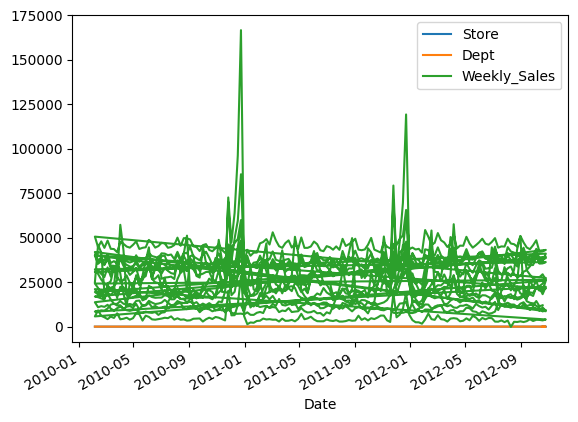

In [8]:
df.plot()

In [9]:
pvalue=adfuller(ts)
print(pvalue)

(-3.3889290330790134, 0.011342119833868895, 23, 1977, {'1%': -3.433661993406868, '5%': -2.8630030510232647, '10%': -2.567548867394869}, 40369.33552568077)


In [10]:
ts2=df['Weekly_Sales']
df['First Diff']=ts2-ts2.shift(1)
r=adfuller(df['First Diff'].dropna())
r

(-13.66041140538516,
 1.525232702428757e-25,
 23,
 1976,
 {'1%': -3.4336636717018405,
  '5%': -2.8630037919874423,
  '10%': -2.567549261922421},
 40358.77439124846)

In [11]:
df['Seasonal Diff']=ts2-ts2.shift(7)
r=adfuller(df['Seasonal Diff'].dropna())
r

(-10.094330218252097,
 1.1009914340186096e-17,
 26,
 1967,
 {'1%': -3.4336788532475775,
  '5%': -2.8630104945933974,
  '10%': -2.567552830738709},
 40610.89856346367)

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import pandas as pd 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.graphics.tsaplots import plot_acf   #Auto Correlation PLOT
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [13]:
df.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-17', '2012-08-24', '2012-08-31', '2012-09-07',
               '2012-09-14', '2012-09-21', '2012-09-28', '2012-10-05',
               '2012-10-12', '2012-10-19'],
              dtype='datetime64[ns]', name='Date', length=2001, freq=None)

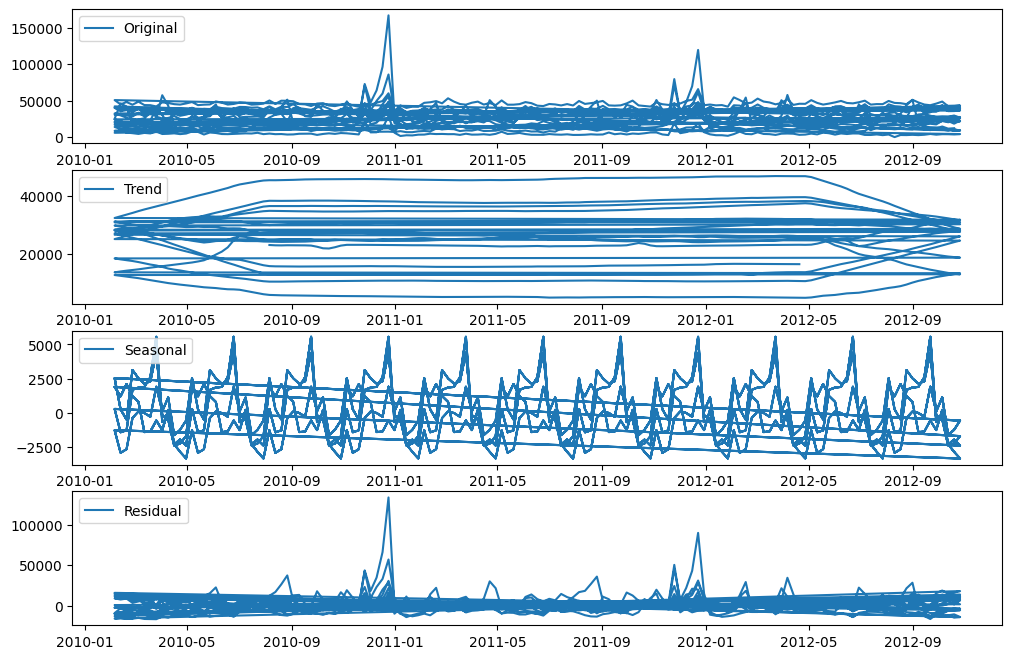

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming df['Weekly_Sales'] contains your time series data

# Decompose the time series
decompose = seasonal_decompose(x=df['Weekly_Sales'], model='additive', period=52)

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decompose.observed, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decompose.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decompose.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decompose.resid, label='Residual')
plt.legend(loc='upper left')

plt.show()


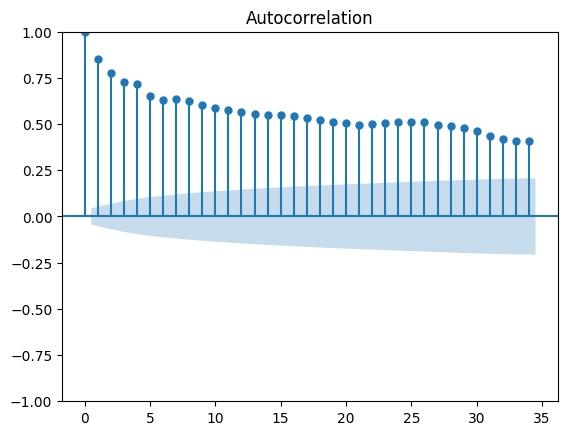

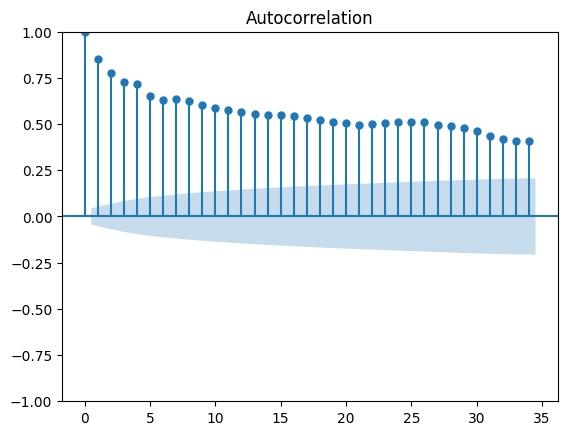

In [16]:
plot_acf(df.Weekly_Sales)

In [17]:
df.describe()

,Store,Dept,Weekly_Sales,First Diff,Seasonal Diff
count,2001.0,2001.000000,2001.000000,2000.000000,1994.000000
mean,1.0,7.496752,25479.814758,-6.444495,-54.947347
std,0.0,4.030523,13737.618740,7426.510724,11742.002072
min,1.0,1.000000,-139.650000,-139264.660000,-145528.660000
25%,1.0,4.000000,14092.030000,-1663.317500,-3153.930000
50%,1.0,7.000000,24213.180000,14.260000,-158.785000
75%,1.0,11.000000,36222.740000,1735.135000,2872.407500
max,1.0,14.000000,166697.720000,70499.600000,147561.140000


In [18]:
training=df.iloc[0:1374,:]
training.describe()

,Store,Dept,Weekly_Sales,First Diff,Seasonal Diff
count,1374.0,1374.000000,1374.000000,1373.000000,1367.000000
mean,1.0,5.316594,26514.552627,4.451843,11.029151
std,0.0,2.780811,14537.328082,8469.381410,13280.120351
min,1.0,1.000000,-139.650000,-139264.660000,-145528.660000
25%,1.0,3.000000,16288.962500,-1712.170000,-3313.720000
50%,1.0,5.000000,26340.130000,15.260000,-136.110000
75%,1.0,8.000000,36459.172500,1872.610000,3287.235000
max,1.0,10.000000,166697.720000,70499.600000,147561.140000


In [19]:
testing=df.iloc[1374:,:]
testing.describe()

,Store,Dept,Weekly_Sales,First Diff,Seasonal Diff
count,627.0,627.000000,627.000000,627.000000,627.000000
mean,1.0,12.274322,23212.303062,-30.305215,-198.790845
std,0.0,1.283227,11486.064292,4348.315340,7354.036350
min,1.0,10.000000,6605.120000,-26148.470000,-32336.130000
25%,1.0,11.000000,12554.490000,-1497.705000,-2816.620000
50%,1.0,12.000000,20462.680000,13.260000,-200.200000
75%,1.0,13.000000,35321.080000,1491.930000,2431.450000
max,1.0,14.000000,47983.720000,33310.880000,33891.690000


In [20]:
model=ExponentialSmoothing(endog=training.Weekly_Sales,trend='add',seasonal='add',seasonal_periods=12).fit()

/home/maria/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/maria/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/maria/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [21]:
prediction=model.forecast(steps=18)

/home/maria/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/maria/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [22]:
prediction.head()
prediction.tail()

1387    32109.813359
1388    31366.127225
1389    30408.004032
1390    30457.764031
1391    29588.106971
dtype: float64

<Axes: >

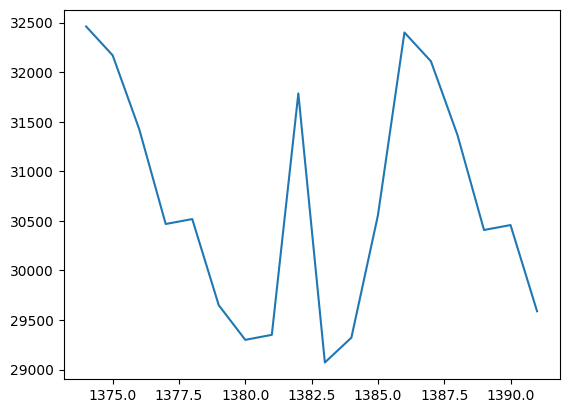

In [23]:


prediction.plot()

<Axes: xlabel='Date'>

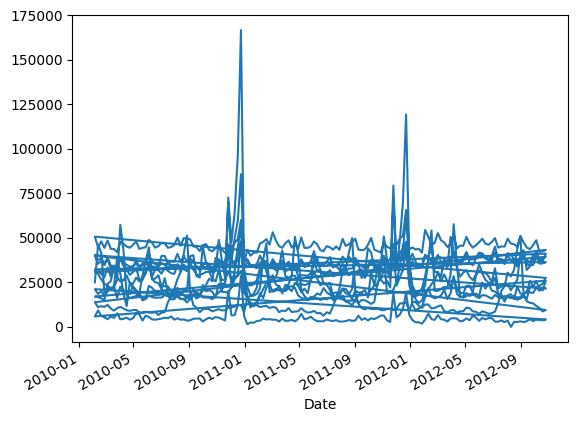

In [24]:
training['Weekly_Sales'].plot()

<Axes: xlabel='Date'>

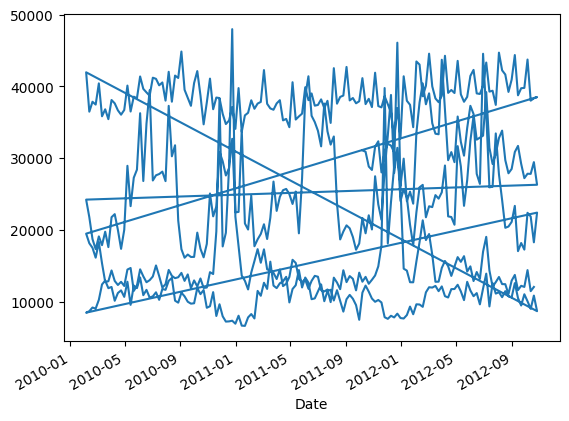

In [25]:
testing['Weekly_Sales'].plot()

In [26]:
from sklearn.metrics import mean_absolute_error

# Assuming model is already trained
# Splitting data
training = df.iloc[:1374]
testing = df.iloc[1374:]

# Making predictions
prediction = model.forecast(steps=len(testing))

# Plotting
#training['Weekly_Sales']['2010-10-29':].plot()ot()

# Calculating mean absolute error
mae = mean_absolute_error(testing['Weekly_Sales'], prediction)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 11487.847630122034


/home/maria/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/maria/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [27]:
mae=mae*0.1
mae

1148.7847630122035